# Proyecto Integrador Nro 2

### INTRODUCCIÓN 
* En este proyecto realizamos un trabajo mas a profundidad sobre el analisis de datos, con el fin de observar el comportamiento a nivel nacional del acceso a internet y todo lo que caracteriza este servicio. por medio de un Analisis Exploratorio de Datos (EDA) observando las diferentes relaciones entre variables y generar informacion de valor que permitan dar a conocer datos e informacion que permitan una mejor calidad de servicio y futuras oportunidades de crecimiento por medio de un Dashboard que permita dar a conocer esta informacion de una manera mas objetiva y de facil entendimiento.

### OBJETIVOS
1. Analisis Exploratorio de Datos (EDA)
2. DashBoard
3. Analisis y Conclusiones
4. KPI´s Mas Relevantes

1. EDA
    - Primero Conocer Los datos
    - Segundo Preparar los datos
    - Cuarto Conclusiones

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Cargamos los datos obtenidos del sitio WEB.

In [2]:
acceso_BW = pd.read_csv('Dataset\AccesosaInternetfijoporvelocidaddebajadaylocalidad_2776171689206806462.csv')
conect_servicio= pd.read_csv('Dataset\ConectividadalserviciodeInternet_2776151689206559167.csv')
denuncia_reclamo= pd.read_csv('Dataset\Denuncias_y_reclamos_202306.csv')
hist_velocidad= pd.read_csv('Dataset\historico_velocidad_internet.csv')
acceso_tecn= pd.read_csv('Dataset\Internet_Accesos-por-tecnologia.csv')
acceso_velocidad= pd.read_csv('Dataset\Internet_Accesos-por-velocidad.csv')
bw_prov= pd.read_csv('Dataset\Internet_BAF_Prov.csv')
bw_ba_nal= pd.read_csv('Dataset/Internet_BAF_nal.csv')
ingreso_net= pd.read_csv('Dataset\Internet_Ingresos.csv')
net_xhabit= pd.read_csv('Dataset\Internet_Penetracion_hab.csv')
net_xhome= pd.read_csv('Dataset\Internet_Penetracion_Hogar.csv')


## Paso 1. Conocer los datos
* Observamos cada dataframe con .info() para identificar el formato de los dato, valores nulos, nombre de columnas y el tamaño del dataframe

In [3]:
acceso_BW.info()
conect_servicio.info()
denuncia_reclamo.info()
hist_velocidad.info()
acceso_tecn.info()
acceso_velocidad.info()
bw_prov.info()
bw_ba_nal.info()
ingreso_net.info()
net_xhabit.info()
net_xhome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3098 entries, 0 to 3097
Data columns (total 83 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   3098 non-null   object 
 1   Partido     3098 non-null   object 
 2   Localidad   3098 non-null   object 
 3   Link Indec  3098 non-null   object 
 4   Otros       956 non-null    object 
 5   0,256 mbps  29 non-null     float64
 6   0,375 mbps  1 non-null      float64
 7   0,5 mbps    643 non-null    object 
 8   0,512 mbps  524 non-null    float64
 9   0,625 mbps  1 non-null      float64
 10  0,75 mbps   284 non-null    object 
 11  1 mbps      931 non-null    object 
 12  1,25 mbps   1 non-null      float64
 13  1,5 mbps    16 non-null     object 
 14  2 mbps      741 non-null    object 
 15  2,2 mbps    1 non-null      float64
 16  2,5 mbps    3 non-null      float64
 17  3 mbps      1388 non-null   object 
 18  3,3 mbps    1 non-null      float64
 19  3,5 mbps    373 non-null   

* Hemos encontrado valores con los cuales podemos concatenar informacion de algunos dataset y tienen mismo tamaño
- Vamos a cambiar algunos nombres de columnas para tal fin y algunos formatos de datos

In [4]:
conect_servicio= conect_servicio.rename(columns={'link':'Link Indec'})
hist_velocidad= hist_velocidad.rename(columns={'Trimestre.1':'Periodo'})

In [5]:
acceso_BW['Link Indec']=acceso_BW['Link Indec'].replace('Sin Datos',0)
acceso_BW['Link Indec']=acceso_BW['Link Indec'].astype(int)


* Creamos un dataset con informacion trimestral a nivel nacional. Por el Periodo
- data_hist tiene:
    - hist_velocidad (Historico de velocidad de intenet)
    - acceso_tecn (Internet Accsesos por teconologia)
    - bw_ba_nal (Internet banda ancha fija nacional)
    - ingreso_net (Ingresos de Intenet)
    - net_xhabit (Intenet penetracion por habitantes)

In [6]:
data_hist= pd.merge(hist_velocidad,acceso_tecn, on='Periodo', suffixes=('_hist_velocidad','_acceso_tecn'))
data_hist= pd.merge(data_hist,bw_ba_nal, on='Periodo', suffixes=('_data_hist','_bw_ba_nal'))
data_hist= pd.merge(data_hist,ingreso_net, on='Periodo', suffixes=('_data_hist','_ingreso_net'))
data_hist= pd.merge(data_hist,net_xhabit, on='Periodo', suffixes=('_data_hist','_net_xhabit'))
data_hist.columns

Index(['Año_hist_velocidad', 'Trimestre_hist_velocidad',
       'Mbps (Media de bajada)', 'Periodo', 'Año_acceso_tecn',
       'Trimestre_acceso_tecn', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total_data_hist', 'Año_data_hist',
       'Trimestre_data_hist', 'Banda ancha fija', 'Dial up', 'Total_bw_ba_nal',
       'Año_ingreso_net', 'Trimestre_ingreso_net', 'Ingresos (miles de pesos)',
       'Año', 'Trimestre', 'Accesos por cada 100 hogares',
       'Accesos por cada 100 hab'],
      dtype='object')

* Eliminamos campos repetidos al concatenar los dataset

In [7]:
drop_list=['Año_hist_velocidad', 'Trimestre_hist_velocidad','Año_acceso_tecn',
       'Trimestre_acceso_tecn','Año_data_hist',
       'Trimestre_data_hist','Total_bw_ba_nal',
       'Año_ingreso_net', 'Trimestre_ingreso_net']
data_hist=data_hist.drop(drop_list, axis=1)
data_hist= data_hist.rename(columns={'Total_data_hist':'Total_Conexiones'})

* Creamos un dataset con informacion por provincia
- data_velocidad tiene:
    - acceso_velocidad (Acceso por velocidad a internet por provincia)
    - bw_prov (Intenet banda ancha fija por provincia)
    - net_xhome (Penetracion de internet por hogar por provincia)

In [8]:
data_velocidad = pd.merge(bw_prov ,acceso_velocidad, on=['Año','Trimestre','Provincia'], suffixes=('_bw_prov','_acceso_velocidad'))
data_velocidad = pd.merge(data_velocidad,net_xhome, on=['Año','Trimestre','Provincia'], suffixes=('_data_velocidad','_net_xhome'))
data_velocidad

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total_bw_prov,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total_acceso_velocidad,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,4.715.469,6.199,4.721.668,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668,"78,11"
1,2022,3,Capital Federal,1.545.534,2.145,1.547.679,517.000,5.742,34.371,67.829,51.946,28.692,1.253.105,105.477,1.547.679,"122,28"
2,2022,3,Catamarca,70.292,1,70.293,71.000,384.000,3.107,5.389,5.099,3.737,50.298,2.208,70.293,"65,33"
3,2022,3,Chaco,144.141,5,144.146,461.000,987.000,16.782,18.938,8.049,15.828,79.390,3.711,144.146,"43,86"
4,2022,3,Chubut,164.874,904,165.778,109.000,1.444,45.707,30.940,34.682,15.309,17.563,20.024,165.778,"84,38"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,2014,1,Santa Cruz,26.304,460,26.764,161.000,1.625,24.972,1.000,1.000,0.000,0,0.000,26.760,"28,94"
836,2014,1,Santa Fe,506.000,612,506.612,8.456,124.468,345.225,20.328,6.845,23.000,668,0.000,506.013,"47,85"
837,2014,1,Santiago Del Estero,37.124,9,37.133,1.234,10.531,22.817,2.422,109.000,0.000,0,0.000,37.113,"16,31"
838,2014,1,Tierra Del Fuego,27.272,766,28.038,12.000,607.000,30.902,6.000,0.000,0.000,0,0.000,31.527,"63,97"


In [9]:
drop_list=['Total_acceso_velocidad']
data_velocidad=data_velocidad.drop(drop_list, axis=1)
data_velocidad= data_velocidad.rename(columns={'Total_bw_prov':'Total_Conexiones'})


### Paso 2. Preparar Los Datos
* Vamos a revisar el formato de los dataset y corregir los datos.
* Rellenar datos faltantes o eliminar informacion errada
- Todo con el fin de tener datos optimos para el analisis siguiente 

In [10]:
data_hist.columns

Index(['Mbps (Media de bajada)', 'Periodo', 'ADSL', 'Cablemodem',
       'Fibra óptica', 'Wireless', 'Otros', 'Total_Conexiones',
       'Banda ancha fija', 'Dial up', 'Ingresos (miles de pesos)', 'Año',
       'Trimestre', 'Accesos por cada 100 hogares',
       'Accesos por cada 100 hab'],
      dtype='object')

* Hacemos una adecuacion en los dataset con los formatos numericos que estan mal instanciados
    - Creamos una funcion para reemplazar ',' que nos da un formato erroneo del dato

In [11]:
df = data_hist[['ADSL', 'Cablemodem','Fibra óptica', 'Wireless', 'Otros', 'Total_Conexiones',
                'Banda ancha fija', 'Dial up', 'Ingresos (miles de pesos)']]

data_hist['Mbps (Media de bajada)']= data_hist['Mbps (Media de bajada)'].str.replace(',','.').astype(float)
data_hist['Accesos por cada 100 hogares']= data_hist['Accesos por cada 100 hogares'].str.replace(',','.').astype(float)
data_hist['Accesos por cada 100 hab']= data_hist['Accesos por cada 100 hab'].str.replace(',','.').astype(float)


def convertir_columnas_entero(df):
    for columna in df.columns:
        if df[columna].dtype == 'object':
            df[columna] = df[columna].str.replace('.', '').astype(int)
        else: df[columna]= (df[columna]*1000).astype(int)
    return df
hist= convertir_columnas_entero(df)

C:\Users\Yeferson\AppData\Local\Temp\ipykernel_1152\234863624.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna] = df[columna].str.replace('.', '').astype(int)
C:\Users\Yeferson\AppData\Local\Temp\ipykernel_1152\234863624.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna] = df[columna].str.replace('.', '').astype(int)
C:\Users\Yeferson\AppData\Local\Temp\ipykernel_1152\234863624.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

* Reemplazamos las variables con el formato adecuado

In [12]:
data_hist[['ADSL', 'Cablemodem','Fibra óptica', 'Wireless', 'Otros', 'Total_Conexiones',
'Banda ancha fija', 'Dial up', 'Ingresos (miles de pesos)']] = hist[['ADSL', 'Cablemodem',
       'Fibra óptica', 'Wireless', 'Otros', 'Total_Conexiones',
       'Banda ancha fija', 'Dial up', 'Ingresos (miles de pesos)']]

* Cambiamos datos mal declarados en el campo 'Dial up' y 'OTROS'

In [13]:
data_velocidad['Dial up']=data_velocidad['Dial up'].str.replace('- 0','0')
data_velocidad['Dial up']=data_velocidad['Dial up'].fillna(0)
data_velocidad['OTROS']= data_velocidad['OTROS'].fillna(0)
data_velocidad.info()
data_velocidad.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           840 non-null    int64  
 1   Trimestre                     840 non-null    int64  
 2   Provincia                     840 non-null    object 
 3   Banda ancha fija              840 non-null    object 
 4   Dial up                       840 non-null    object 
 5   Total_Conexiones              840 non-null    object 
 6   HASTA 512 kbps                840 non-null    float64
 7   + 512 Kbps - 1 Mbps           840 non-null    float64
 8   + 1 Mbps - 6 Mbps             840 non-null    object 
 9   + 6 Mbps - 10 Mbps            840 non-null    float64
 10  + 10 Mbps - 20 Mbps           840 non-null    float64
 11  + 20 Mbps - 30 Mbps           840 non-null    float64
 12  + 30 Mbps                     840 non-null    object 
 13  OTROS

Index(['Año', 'Trimestre', 'Provincia', 'Banda ancha fija', 'Dial up',
       'Total_Conexiones', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps',
       '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps',
       '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Accesos por cada 100 hogares'],
      dtype='object')

* Repetimos el proceso anterior sobre el 'data_velocidad'

In [14]:
df = data_velocidad[['Banda ancha fija', 'Dial up',
       'Total_Conexiones', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps',
       '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps',
       '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']]
def columnas_entero(df):
    for columna in df.columns:
        if df[columna].dtype == 'object':
            df[columna] = df[columna].str.replace('.', '')
        
    return df


vel= columnas_entero(df)
vel['Dial up']=vel['Dial up'].fillna('0')
vel.isnull().sum()


vel= convertir_columnas_entero(vel)
data_velocidad['Accesos por cada 100 hogares']= data_velocidad['Accesos por cada 100 hogares'].str.replace(',','.').astype(float)

C:\Users\Yeferson\AppData\Local\Temp\ipykernel_1152\945255248.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna] = df[columna].str.replace('.', '')
C:\Users\Yeferson\AppData\Local\Temp\ipykernel_1152\945255248.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vel['Dial up']=vel['Dial up'].fillna('0')
C:\Users\Yeferson\AppData\Local\Temp\ipykernel_1152\234863624.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [15]:
data_velocidad[['Banda ancha fija', 'Dial up',
       'Total_Conexiones', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps',
       '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps',
       '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']] = vel[['Banda ancha fija', 'Dial up',
       'Total_Conexiones', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps',
       '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps',
       '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']]

* Reemplazamos datos con valores mal ingestados '--' por 'NO'

In [16]:
conect_servicio.replace('--','No', inplace=True)
conect_servicio.fillna(0, inplace=True)
acceso_BW.fillna(0, inplace=True)

* Volvemos a realizar cambios de valores para cambiar a formatos numericos en los dataset's, por medio de funciones

In [17]:
df=acceso_BW.iloc[:,4:83]
def columnas_float(df):
    for columna in df.columns:
        if df[columna].dtype == 'object':
            try:
                df[columna] = df[columna].str.replace(',','')
                df[columna].fillna(0, inplace=True)
                df[columna]=df[columna].astype(float)
            except ValueError: 
                    continue
    
    return df

df=columnas_float(df)

In [18]:
acceso_BW.iloc[:,4:83]=df
def columnas_a_float(df):
    for columna in df.columns:
        if df[columna].dtype == 'object':
            try:
                df[columna] = df[columna].astype(float)
            except ValueError:
                continue
    return df
bw=columnas_a_float(acceso_BW)
bw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3098 entries, 0 to 3097
Data columns (total 83 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   3098 non-null   object 
 1   Partido     3098 non-null   object 
 2   Localidad   3098 non-null   object 
 3   Link Indec  3098 non-null   int32  
 4   Otros       3098 non-null   float64
 5   0,256 mbps  3098 non-null   float64
 6   0,375 mbps  3098 non-null   float64
 7   0,5 mbps    3098 non-null   float64
 8   0,512 mbps  3098 non-null   float64
 9   0,625 mbps  3098 non-null   float64
 10  0,75 mbps   3098 non-null   float64
 11  1 mbps      3098 non-null   float64
 12  1,25 mbps   3098 non-null   float64
 13  1,5 mbps    3098 non-null   float64
 14  2 mbps      3098 non-null   float64
 15  2,2 mbps    3098 non-null   float64
 16  2,5 mbps    3098 non-null   float64
 17  3 mbps      3098 non-null   float64
 18  3,3 mbps    3098 non-null   float64
 19  3,5 mbps    3098 non-null  

*Realizamos en cambio de ',' por '.' en Latitud y Longitud para facilitar su consumo como valores numericos

In [19]:
conect_servicio['Latitud']=conect_servicio['Latitud'].str.replace(',','.')
conect_servicio['Longitud']=conect_servicio['Longitud'].str.replace(',','.')
conect_servicio

,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,Link Indec,Latitud,Longitud
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,0,No,No,No,No,No,No,No,SI,SI,6056020.0,-38.6472605094596,-62.3200223419024
1,BUENOS AIRES,Bahía Blanca,Villa Espora,0,No,No,No,No,No,No,No,No,No,6056020.0,-38.7765069529222,-62.1851833537179
2,BUENOS AIRES,Balcarce,Balcarce,38376,SI,SI,SI,SI,No,SI,SI,SI,SI,6063010.0,-37.8482779294345,-58.2551665841248
3,BUENOS AIRES,Balcarce,Los Pinos,337,No,No,No,No,No,SI,SI,No,No,6063020.0,-37.9412057603,-58.3225920150442
4,BUENOS AIRES,Balcarce,Napaleofú,374,No,No,No,SI,No,SI,SI,SI,SI,6063030.0,-37.6254980210026,-58.7461862359423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,CHACO,Quitilipi,Quitilipi,24517,SI,No,No,SI,No,SI,SI,SI,SI,22133010.0,-26.8732071732978,-60.2185241226399
4308,CHACO,Quitilipi,Villa El Palmar,879,No,No,No,No,No,SI,No,No,SI,22133020.0,-26.4551186226266,-60.1646165913523
4309,CHACO,San Fernando,Barranqueras,54698,SI,SI,No,SI,No,SI,SI,SI,SI,22140010.0,-27.4877739289761,-58.9327416886365
4310,CHACO,San Fernando,Basail,1929,SI,SI,No,No,SI,SI,SI,SI,SI,22140020.0,-27.8868655966917,-59.2791003619491


In [20]:
acceso_BW.head(5)

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps",...,75 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
data_hist.head(5)

,Mbps (Media de bajada),Periodo,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_Conexiones,Banda ancha fija,Dial up,Ingresos (miles de pesos),Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
0,62.46,Jul-Sept 2022,1395277,6031970,2871541,557110,235230,11091128,11078691,12437,67055930,2022,3,76.64,23.95
1,58.44,Abr-Jun 2022,1468333,5979214,2723285,556243,231609,10958684,10946248,12436,60335724,2022,2,75.97,23.72
2,55.11,Ene-Mar 2022,1533240,6073426,2219533,545814,251996,10624009,10611390,12619,55589997,2022,1,73.88,23.05
3,52.34,Oct-Dic 2021,1657615,5984240,2072236,523107,252596,10489794,10476933,12861,45467887,2021,4,73.18,22.81
4,48.46,Jul-Sept 2021,1950631,5826257,1566048,492415,250190,10085541,10075184,10357,42999944,2021,3,70.58,21.98


### Paso 3. Analsiis Grafico y descriptivo

* Se realiza un analisis de los datos agrupados y no agrupados para determinar las caracteristias mas importantes
    - Primero un analisis estadistico general de los dataset finales: Para observar el comportamiento de los campos numericos

In [22]:
data_hist.describe()

,Mbps (Media de bajada),ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_Conexiones,Banda ancha fija,Dial up,Ingresos (miles de pesos),Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,35.000000,3.500000e+01,3.500000e+01,3.500000e+01,35.000000,35.000000,3.500000e+01,3.500000e+01,35.000000,3.500000e+01,35.000000,35.000000,35.000000,35.000000
mean,21.827143,3.040425e+06,4.122601e+06,7.390627e+05,248280.028571,147431.085714,8.297800e+06,8.274417e+06,23383.371429,2.058845e+07,2017.885714,2.457143,60.275429,18.606286
std,19.230717,8.354122e+05,1.225277e+06,7.861772e+05,174354.292929,85868.716764,1.399611e+06,1.408774e+06,10087.397193,1.774214e+07,2.564135,1.120474,8.148909,2.662968
min,3.620000,1.395277e+06,2.407330e+06,1.391870e+05,70749.000000,54300.000000,6.398398e+06,6.362108e+06,9991.000000,2.984054e+06,2014.000000,1.000000,49.550000,15.050000
25%,5.250000,2.279711e+06,2.966749e+06,1.679880e+05,85107.500000,62763.500000,7.057455e+06,7.024946e+06,12436.500000,6.235543e+06,2016.000000,1.500000,52.985000,16.245000
50%,13.850000,3.557216e+06,4.038141e+06,2.262850e+05,194267.000000,100554.000000,8.110444e+06,8.083533e+06,26911.000000,1.431947e+07,2018.000000,2.000000,59.160000,18.240000
75%,39.495000,3.723156e+06,5.132233e+06,1.138802e+06,394963.000000,247918.500000,9.260442e+06,9.244537e+06,32508.500000,3.204996e+07,2020.000000,3.000000,66.050000,20.475000
max,62.460000,3.803024e+06,6.073426e+06,2.871541e+06,557110.000000,265328.000000,1.109113e+07,1.107869e+07,39324.000000,6.705593e+07,2022.000000,4.000000,76.640000,23.950000


In [23]:
data_velocidad.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total_Conexiones,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Accesos por cada 100 hogares
count,840.000000,840.000000,8.400000e+02,840.000000,8.400000e+02,840.000000,840.000000,8.400000e+02,840.000000,840.000000,840.000000,8.400000e+02,840.000000,840.000000
mean,2017.885714,2.457143,3.447674e+05,974.307143,3.457417e+05,126009.994048,101790.388095,1.509700e+05,71417.261905,79988.622619,100758.147619,7.917956e+04,32701.797619,49.065750
std,2.528745,1.105009,7.400503e+05,2418.317775,7.419436e+05,187578.608912,207396.127819,3.481538e+05,140324.224165,170586.595341,208683.471459,3.426234e+05,128506.010947,23.151885
min,2014.000000,1.000000,1.219300e+04,0.000000,1.255700e+04,1006.000000,0.000000,2.842000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000,9.350000
25%,2016.000000,1.000000,5.192225e+04,9.000000,5.202975e+04,10000.000000,3362.500000,2.853925e+04,5357.250000,4872.000000,2018.000000,7.000000e+00,0.000000,32.107500
50%,2018.000000,2.000000,1.029360e+05,148.000000,1.034895e+05,50000.000000,8788.000000,4.883450e+04,20157.000000,14965.500000,11251.500000,8.825000e+02,0.000000,45.900000
75%,2020.000000,3.000000,1.778685e+05,619.000000,1.779148e+05,134000.000000,84340.500000,8.689750e+04,62225.500000,55093.000000,64286.000000,1.966075e+04,7376.250000,61.865000
max,2022.000000,4.000000,4.715469e+06,15229.000000,4.721668e+06,998000.000000,999000.000000,2.299705e+06,917000.000000,978000.000000,997000.000000,3.618689e+06,923000.000000,124.060000


In [24]:
acceso_BW.describe()

,Link Indec,Otros,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps","0,75 mbps",1 mbps,"1,25 mbps",...,75 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps
count,3.098000e+03,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,...,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000
mean,3.869270e+07,112.664622,0.031633,0.072628,10.184312,0.367657,0.035830,3.629116,27.557456,0.008070,...,41.813751,0.000646,0.902195,0.000323,0.000323,0.004519,0.001291,0.000968,0.000323,716.212718
std,2.982978e+07,2084.791917,0.691033,4.042424,518.170826,2.142655,1.994262,37.617678,193.093052,0.449158,...,579.037948,0.035933,24.386534,0.017966,0.017966,0.251529,0.056809,0.040169,0.017966,9715.833800
min,0.000000e+00,-601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000706e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.009812e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.611728e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.401402e+07,105017.000000,31.000000,225.000000,28837.000000,61.000000,111.000000,1307.000000,6307.000000,25.000000,...,30482.000000,2.000000,952.000000,1.000000,1.000000,14.000000,3.000000,2.000000,1.000000,490536.000000


In [25]:
conect_servicio.describe()

,Poblacion,Link Indec
count,4.312000e+03,4.312000e+03
mean,8.693093e+03,3.898991e+07
std,3.821544e+04,2.942430e+07
min,0.000000e+00,0.000000e+00
25%,1.160000e+02,1.008409e+07
50%,5.755000e+02,3.400701e+07
75%,3.202000e+03,6.612078e+07
max,1.317298e+06,9.401402e+07


* Tambien observamos correlaciones de los dataset's

In [26]:
data_hist.drop('Periodo',axis=1).corr()

,Mbps (Media de bajada),ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_Conexiones,Banda ancha fija,Dial up,Ingresos (miles de pesos),Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
Mbps (Media de bajada),1.000000,-0.992667,0.956224,0.966629,0.983156,0.882787,0.964207,0.964463,-0.911534,0.984057,0.936741,0.015896,0.961953,0.962488
ADSL,-0.992667,1.000000,-0.943710,-0.966371,-0.979537,-0.898066,-0.949218,-0.949576,0.912338,-0.973370,-0.918892,-0.012387,-0.947447,-0.947734
Cablemodem,0.956224,-0.943710,1.000000,0.889208,0.978705,0.920982,0.990053,0.990395,-0.947081,0.939091,0.986734,0.052630,0.987716,0.988355
Fibra óptica,0.966629,-0.966371,0.889208,1.000000,0.939292,0.807540,0.929899,0.929627,-0.806665,0.985812,0.870889,0.006657,0.930781,0.930592
Wireless,0.983156,-0.979537,0.978705,0.939292,1.000000,0.928557,0.981276,0.981483,-0.920277,0.965350,0.952513,0.036617,0.981368,0.981172
Otros,0.882787,-0.898066,0.920982,0.807540,0.928557,1.000000,0.900849,0.901456,-0.903057,0.836098,0.886452,0.056511,0.902476,0.901546
Total_Conexiones,0.964207,-0.949218,0.990053,0.929899,0.981276,0.900849,1.000000,0.999995,-0.907708,0.966420,0.977582,0.050449,0.999617,0.999818
Banda ancha fija,0.964463,-0.949576,0.990395,0.929627,0.981483,0.901456,0.999995,1.000000,-0.908965,0.966299,0.977960,0.050467,0.999557,0.999773
Dial up,-0.911534,0.912338,-0.947081,-0.806665,-0.920277,-0.903057,-0.907708,-0.908965,1.000000,-0.860996,-0.940799,-0.048437,-0.899597,-0.901828
Ingresos (miles de pesos),0.984057,-0.973370,0.939091,0.985812,0.965350,0.836098,0.966420,0.966299,-0.860996,1.000000,0.929619,-0.010465,0.965480,0.965814


In [27]:
acceso_BW.drop(['Provincia','Partido','Localidad'],axis=1).corr()

,Link Indec,Otros,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps","0,75 mbps",1 mbps,"1,25 mbps",...,75 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps
Link Indec,1.000000,-0.032594,-0.006095,-0.010053,-0.024046,0.040101,-0.010053,-0.024655,-0.013641,-0.010053,...,-0.079987,-0.019473,0.035942,-0.000405,-0.019239,-0.019625,-0.016236,-0.025986,0.026130,-0.049159
Otros,-0.032594,1.000000,0.001605,-0.000971,0.334151,0.021909,-0.000971,0.040892,0.002772,-0.000971,...,0.001047,-0.000971,0.006423,-0.000971,-0.000971,-0.000945,-0.001106,-0.000177,-0.000825,0.004506
"0,256 mbps",-0.006095,0.001605,1.000000,-0.000823,0.013063,0.531226,-0.000823,0.532792,0.355996,-0.000823,...,0.767734,-0.000823,0.005357,-0.000823,-0.000823,-0.000823,-0.001041,0.022161,0.051193,0.757641
"0,375 mbps",-0.010053,-0.000971,-0.000823,1.000000,-0.000284,-0.003084,1.000000,-0.001734,-0.002565,1.000000,...,-0.001298,-0.000323,-0.000665,-0.000323,-0.000323,-0.000323,-0.000408,-0.000433,-0.000323,-0.001325
"0,5 mbps",-0.024046,0.334151,0.013063,-0.000284,1.000000,0.002630,-0.000284,0.009926,0.005611,-0.000284,...,0.014090,-0.000110,-0.000575,-0.000284,-0.000319,-0.000353,-0.000140,0.001543,-0.000041,0.013688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85 mbps,-0.019625,-0.000945,-0.000823,-0.000323,-0.000353,-0.003084,-0.000323,0.001610,-0.002100,-0.000323,...,-0.001298,-0.000323,-0.000665,-0.000323,-0.000323,1.000000,-0.000408,-0.000433,-0.000323,-0.000735
90 mbps,-0.016236,-0.001106,-0.001041,-0.000408,-0.000140,0.012015,-0.000408,0.010045,0.001288,-0.000408,...,-0.001632,-0.000408,-0.000841,-0.000408,-0.000408,-0.000408,1.000000,-0.000548,-0.000408,0.000190
92 mbps,-0.025986,-0.000177,0.022161,-0.000433,0.001543,0.014620,-0.000433,0.321410,0.115203,-0.000433,...,0.033520,-0.000433,-0.000892,-0.000433,-0.000433,-0.000433,-0.000548,1.000000,-0.000433,0.084389
95 mbps,0.026130,-0.000825,0.051193,-0.000323,-0.000041,0.013692,-0.000323,-0.001256,0.116664,-0.000323,...,-0.001298,-0.000323,-0.000665,-0.000323,-0.000323,-0.000323,-0.000408,-0.000433,1.000000,0.058147


In [29]:
data_velocidad.drop('Provincia',axis=1).corr()

,Año,Trimestre,Banda ancha fija,Dial up,Total_Conexiones,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Accesos por cada 100 hogares
Año,1.000000,-0.063178,0.076499,-0.161256,0.075778,-0.014977,0.265885,-0.147237,0.010509,-0.137127,0.069938,0.255217,0.242540,0.421617
Trimestre,-0.063178,1.000000,0.003948,-0.008302,0.003911,0.013412,-0.011272,-0.003990,0.018720,-0.035877,0.023336,0.003525,0.046004,0.025418
Banda ancha fija,0.076499,0.003948,1.000000,0.782258,0.999998,0.037314,-0.021222,0.817620,0.325096,0.339651,0.158204,0.718001,-0.014217,0.406535
Dial up,-0.161256,-0.008302,0.782258,1.000000,0.783521,0.025409,-0.029003,0.907556,0.332336,0.309815,0.123453,0.266047,-0.041336,0.379811
Total_Conexiones,0.075778,0.003911,0.999998,0.783521,1.000000,0.037301,-0.021263,0.818491,0.325350,0.339794,0.158202,0.717036,-0.014316,0.406736
HASTA 512 kbps,-0.014977,0.013412,0.037314,0.025409,0.037301,1.000000,0.003965,0.001587,0.088934,0.041349,0.021260,0.028124,-0.001887,0.110754
+ 512 Kbps - 1 Mbps,0.265885,-0.011272,-0.021222,-0.029003,-0.021263,0.003965,1.000000,-0.025901,-0.034583,-0.102323,-0.003210,-0.005433,0.056312,0.210278
+ 1 Mbps - 6 Mbps,-0.147237,-0.003990,0.817620,0.907556,0.818491,0.001587,-0.025901,1.000000,0.297376,0.301292,0.126327,0.233390,-0.047629,0.278612
+ 6 Mbps - 10 Mbps,0.010509,0.018720,0.325096,0.332336,0.325350,0.088934,-0.034583,0.297376,1.000000,0.154210,0.028496,0.188919,-0.018150,0.159013
+ 10 Mbps - 20 Mbps,-0.137127,-0.035877,0.339651,0.309815,0.339794,0.041349,-0.102323,0.301292,0.154210,1.000000,0.074541,0.128377,0.088496,0.098786


* Exportamos los dataset generados, para ingestar nuestra base de datos en MySQL

In [ ]:
#data_velocidad.to_csv('data_velocidades.csv', index=False)
#data_hist.to_csv('data_conexiones.csv', index=False)
#acceso_BW.to_csv('Acceso.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      4312 non-null   object 
 1   Partido        4312 non-null   object 
 2   Localidad      4312 non-null   object 
 3   Poblacion      4312 non-null   int64  
 4   ADSL           4312 non-null   object 
 5   CABLEMODEM     4312 non-null   object 
 6   DIALUP         4312 non-null   object 
 7   FIBRAOPTICA    4312 non-null   object 
 8   SATELITAL      4312 non-null   object 
 9   WIRELESS       4312 non-null   object 
 10  TELEFONIAFIJA  4312 non-null   object 
 11  3G             4312 non-null   object 
 12  4G             4312 non-null   object 
 13  Link Indec     4312 non-null   float64
 14  Latitud        4312 non-null   object 
 15  Longitud       4312 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 539.1+ KB


* Histogramas y distribucion de los datos

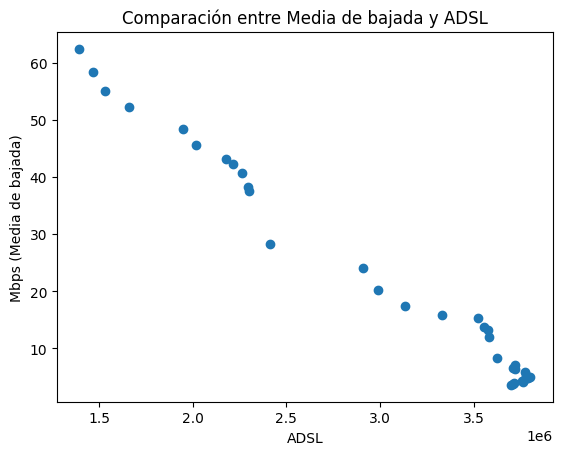

In [31]:
plt.scatter(data_hist['ADSL'], data_hist['Mbps (Media de bajada)'])

# Configurar los ejes y el título del gráfico
plt.xlabel('ADSL')
plt.ylabel('Mbps (Media de bajada)')
plt.title('Comparación entre Media de bajada y ADSL')

# Mostrar el gráfico
plt.show()

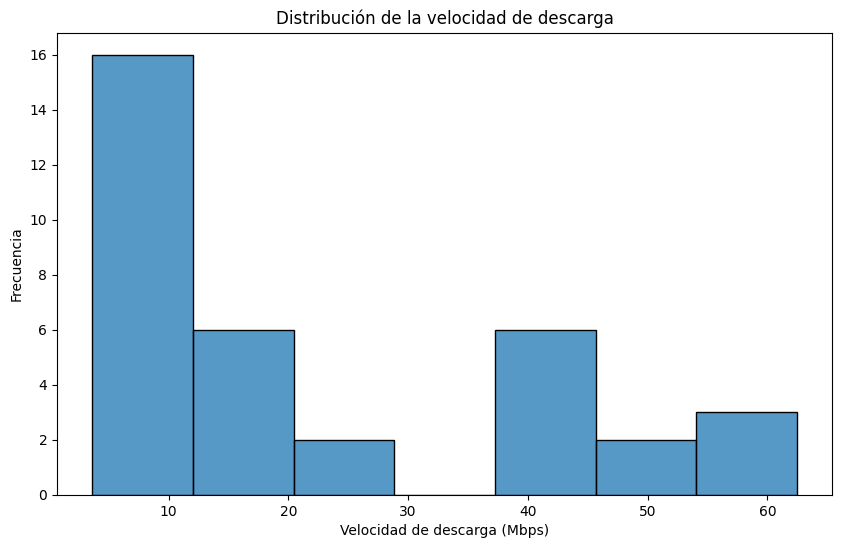

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_hist, x="Mbps (Media de bajada)")
plt.xlabel("Velocidad de descarga (Mbps)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la velocidad de descarga")
plt.show()

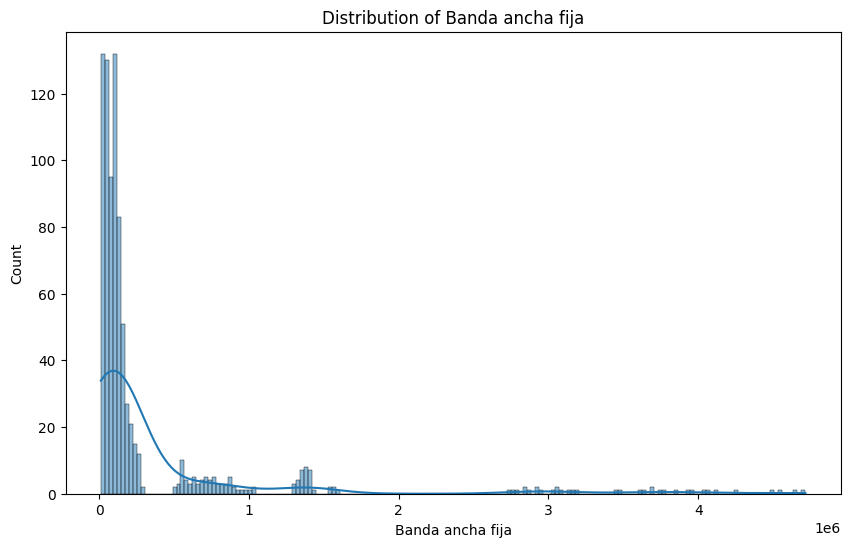

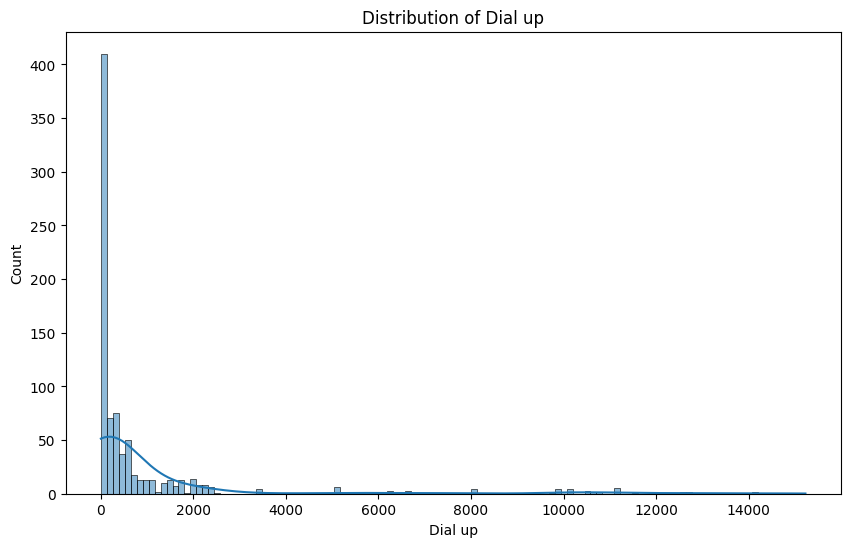

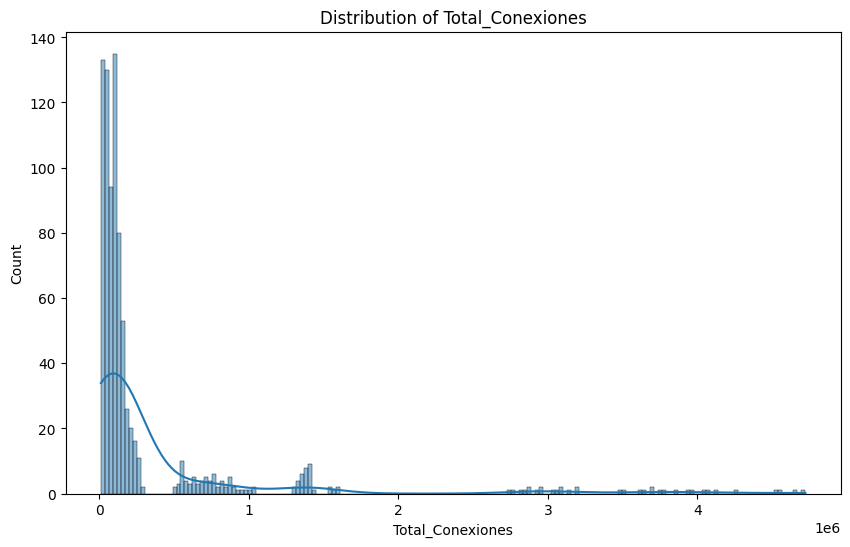

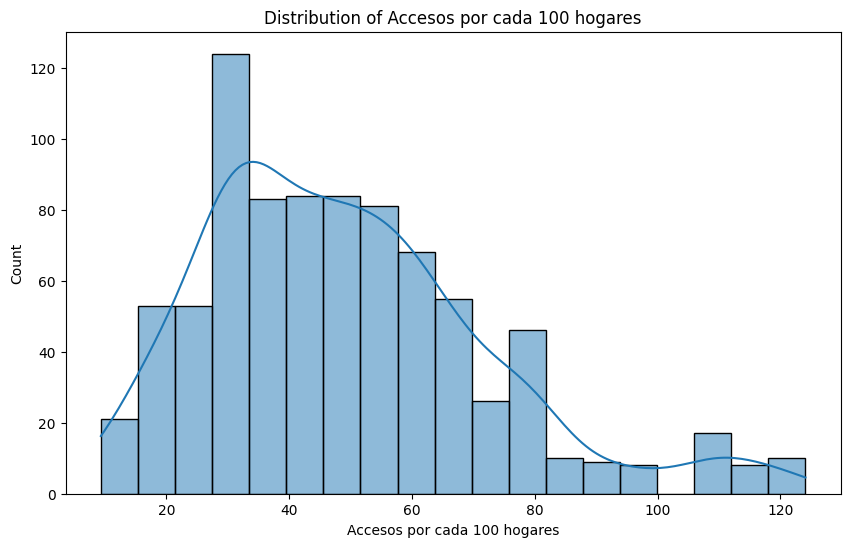

In [33]:
columnas_numericas = ['Banda ancha fija', 'Dial up', 'Total_Conexiones', 'Accesos por cada 100 hogares']
for columna in columnas_numericas:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data_velocidad, x=columna, kde=True)
    plt.title(f'Distribution of {columna}')
    plt.show()

### 4. Analisis de Covertura del Servicio de Internet a Nivel Nacional

* en esta parte observaremos el comportamiento del servicio de internet en Argentina, observando su covertura y calidad de servicio mediante las conexiones y velocidades de navegacion disponible

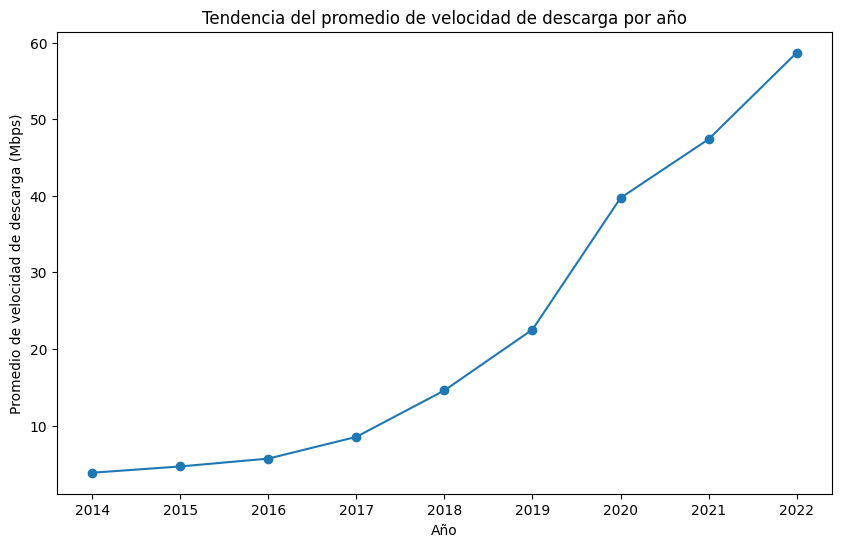

In [34]:
plt.figure(figsize=(10, 6))
data_hist.groupby("Año")["Mbps (Media de bajada)"].mean().plot(marker="o")
plt.xlabel("Año")
plt.ylabel("Promedio de velocidad de descarga (Mbps)")
plt.title("Tendencia del promedio de velocidad de descarga por año")
plt.xticks(data_hist["Año"].unique())  # Asegura que los años se muestren en el eje x
plt.show()

* Un indicador de mejora del servicio a travez de los años es la velocidad promedio de velocidad de descarga. lo que indica un acceso a mejore infraestructuray nuevas tecnologias.
* En este grafico se observa un comportamiento exponecial en el crecimiento de la velocidad de descarga

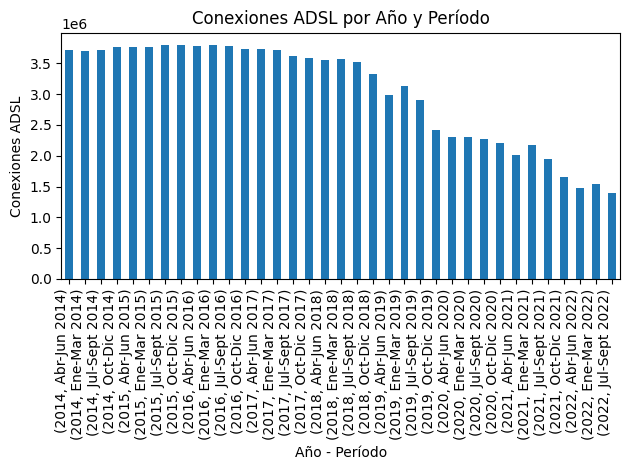

In [ ]:
# Agrupar las conexiones ADSL por año y período
adsl_by_year_periodo = data_hist.groupby(['Año', 'Periodo'])['ADSL'].sum()

# Crear el gráfico de barras
fig, ax = plt.subplots()
adsl_by_year_periodo.plot(kind='bar', ax=ax)

# Configurar los ejes y el título del gráfico
ax.set_xlabel('Año - Período')
ax.set_ylabel('Conexiones ADSL')
ax.set_title('Conexiones ADSL por Año y Período')

# Ajustar las etiquetas del eje x
plt.xticks(rotation=90, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

* Otra manera de determinar factores de calidad es observar el comportamiento de conexiones denominadas 'Lentas', come es el caso de ADSL
* ADSL es una conexion de tipo telefonica, lo cual lo hace muy limitada
* Este grafico observamos dos aspectos, su disminucion continua desde el 2017, pero tambien que en el ultimo año se detuvo

In [ ]:
# Obtener la cantidad de veces que cada tipo de conexión es 'SI' por provincia
conexiones_si_por_provincia = conect_servicio.groupby('Provincia')[['ADSL', 'CABLEMODEM', 'DIALUP', 'FIBRAOPTICA', 'SATELITAL', 'WIRELESS', 'TELEFONIAFIJA', '3G', '4G']].apply(lambda x: (x == 'SI').sum())
localidades_por_provincia = conect_servicio.groupby('Provincia')['Localidad'].nunique()
# Mostrar los resultados
conexiones_si_por_provincia=conexiones_si_por_provincia.merge(localidades_por_provincia, on='Provincia')
conexiones_si_por_provincia

,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,Localidad
Provincia,,,,,,,,,,
BUENOS AIRES,355,345,213,443,157,497,548,590,655,888
CABA,48,48,48,48,48,48,48,48,48,48
CATAMARCA,7,3,1,23,48,33,31,29,57,167
CHACO,28,14,1,45,43,46,47,44,75,92
CHUBUT,13,11,15,13,49,31,54,31,38,90
CORDOBA,181,89,5,172,73,292,310,277,344,540
CORRIENTES,21,9,1,12,55,45,51,39,70,78
ENTRE RIOS,47,39,4,44,22,130,128,78,128,191
FORMOSA,13,3,0,16,23,59,30,16,42,63


* Ahora observemos las conexiones disponibles a nivel de provincias   

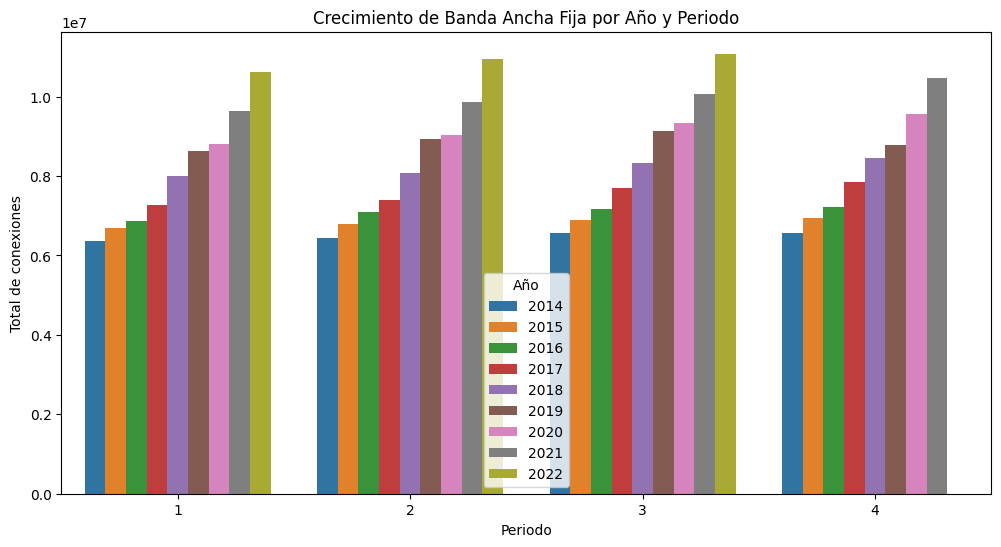

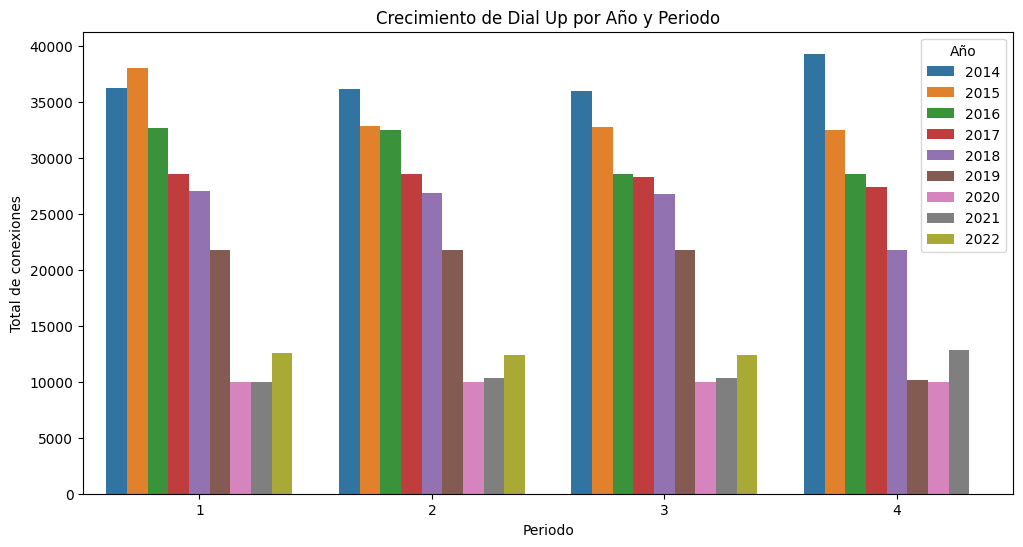

In [ ]:
df_grouped = data_hist.groupby(['Trimestre','Año']).sum()[['Banda ancha fija', 'Dial up']].reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='Trimestre', y='Banda ancha fija', hue='Año')
plt.xlabel('Periodo')
plt.ylabel('Total de conexiones')
plt.title('Crecimiento de Banda Ancha Fija por Año y Periodo')
plt.legend(title='Año')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='Trimestre', y='Dial up', hue='Año')
plt.xlabel('Periodo')
plt.ylabel('Total de conexiones')
plt.title('Crecimiento de Dial Up por Año y Periodo')
plt.legend(title='Año')
plt.show()



* Este grafico de barras compara el crecimiento de banda fija y Dial up por año y trimestre
    - Dial up es el protocolo de conexion a internet mas antiguo, por ende el mas lento
    - Dial up a sido claramente reemplazado lo cual indica su caida
    - los ultimos 3 años indican de nuevo un crecimiento en el Dial-up
* Es Preocupante el aumento del Dial up. este factor puede indicar un atrazo en la implementacion de tecnologias de conexion a internet de alta velocidad


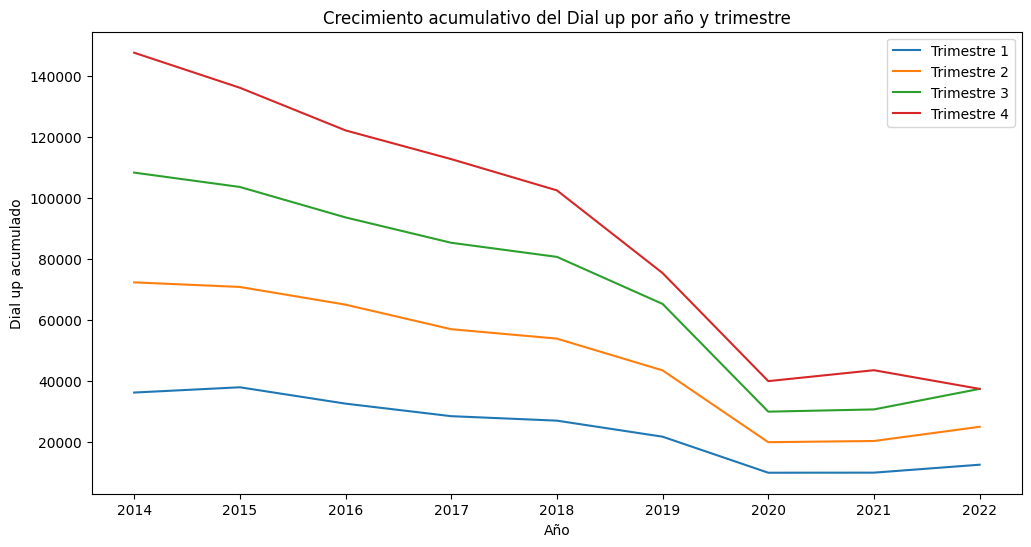

In [38]:
table = data_velocidad.pivot_table(values='Dial up', index='Año', columns='Trimestre', aggfunc='sum', fill_value=0)

# Calcular el crecimiento acumulativo del Dial up por año y trimestre
table_cumulative = table.cumsum(axis=1)

#colores para cada trimestre
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

# gráfico de líneas
plt.figure(figsize=(12, 6))
for i, column in enumerate(table_cumulative.columns):
    plt.plot(table_cumulative.index, table_cumulative[column], color=colors[i], label=f'Trimestre {column}')
plt.title('Crecimiento acumulativo del Dial up por año y trimestre')
plt.xlabel('Año')
plt.ylabel('Dial up acumulado')
plt.legend()
plt.show()

* Es importante resaltar con este grafico el crecimiento de las conexiones Dial up
* Para observar de mejor manera el comportamiento de Dial up este grafico de lineas nos muestra de mejor manera
* Podemos reafirmar el crecimiento de la Conexiones de Dial up en los ultimos años, lo cual afecta un acceso a internet de buena calidad

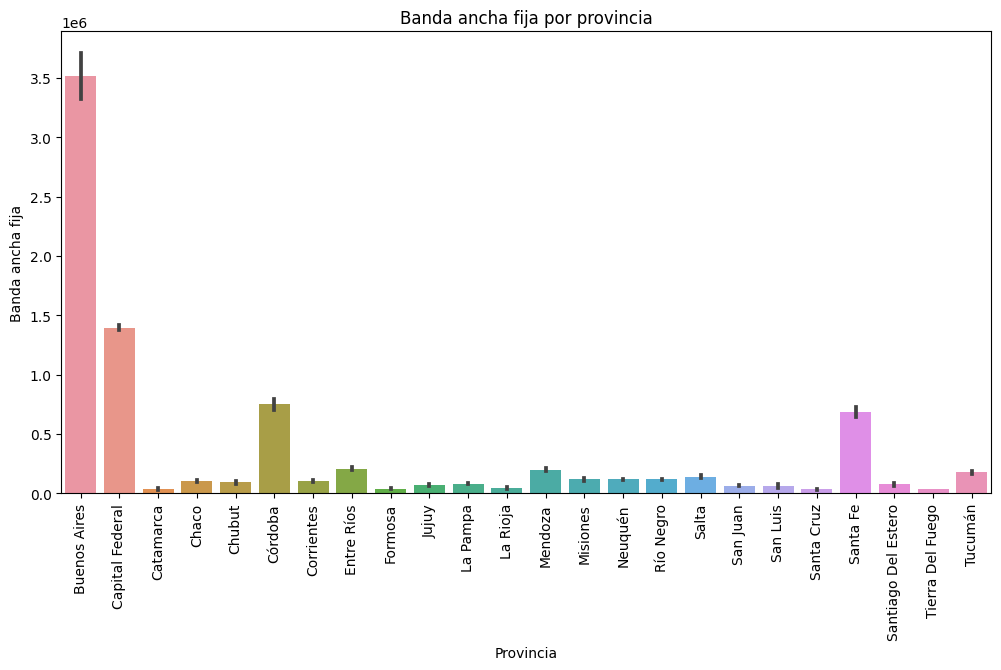

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data_velocidad, x='Provincia', y='Banda ancha fija')
plt.title('Banda ancha fija por provincia')
plt.xticks(rotation=90)
plt.show()

* Aqui se observa que las conexiones a banda ancha se ubican mayormente en BUENOS AIRES. debido a la cantidad de localidades por provincia, ya antes indicado

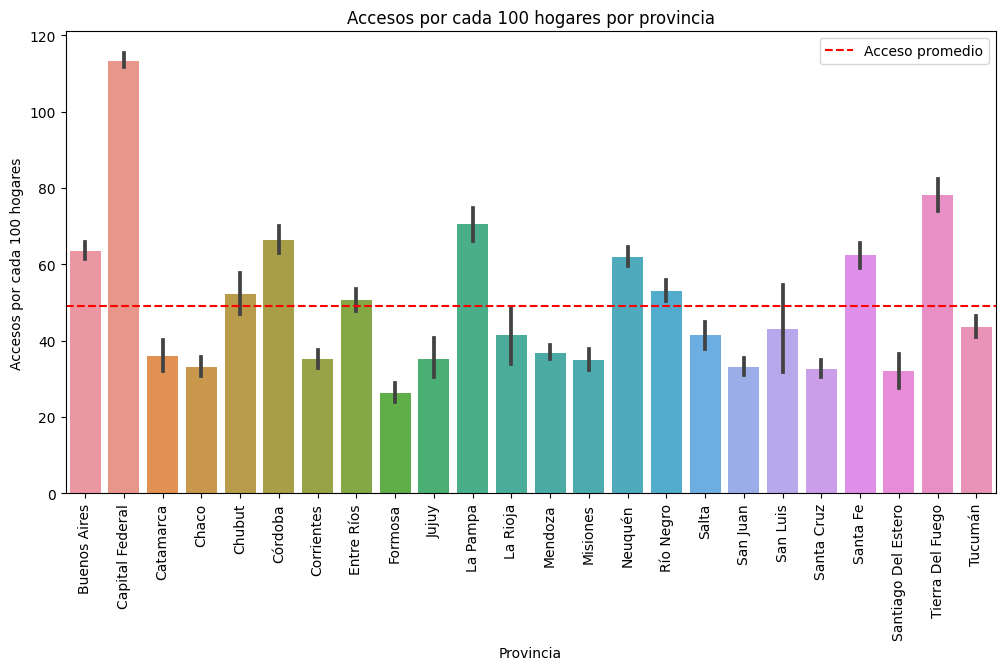

In [ ]:
acceso_promedio = data_velocidad['Accesos por cada 100 hogares'].mean()

# Gráfico de barras de 'Accesos por cada 100 hogares' por provincia
plt.figure(figsize=(12, 6))
sns.barplot(data=data_velocidad, x='Provincia', y='Accesos por cada 100 hogares')
plt.axhline(acceso_promedio, color='red', linestyle='--', label='Acceso promedio')
plt.title('Accesos por cada 100 hogares por provincia')
plt.xticks(rotation=90)
plt.legend()
plt.show()

* Un Aspecto a tener en cuenta en el acceso de los hogares a conexiones de internet. ya que un hogar es mayor mente un punto de acceso para varios habitantes.
* Este grafico presenta claramente el comportamiento de acceso a internet en el territorio nacional.
* Aqui podemos observar la brecha y la falta de acceso a internet, ya que muchas Provincias estan por debajo de la Media

In [ ]:
Covertura_media = data_velocidad['Accesos por cada 100 hogares'].mean()
Covertura_media

49.06575

In [ ]:
total_poblacion = conect_servicio.groupby('Provincia')['Poblacion'].sum()
total_poblacion

Provincia
BUENOS AIRES           14911542
CABA                    2890151
CATAMARCA                343343
CHACO                    927414
CHUBUT                   490554
CORDOBA                 3139606
CORRIENTES               857994
ENTRE RIOS              1119919
FORMOSA                  452714
JUJUY                    628141
LA PAMPA                 302570
LA RIOJA                 319248
MENDOZA                 1654993
MISIONES                 836097
NEUQUEN                  522527
RIO NEGRO                597058
SALTA                   1117163
SAN JUAN                 631000
SAN LUIS                 410669
SANTA CRUZ               268436
SANTA FE                3055611
SANTIAGO DEL ESTERO      671932
TIERRA DEL FUEGO         125823
TUCUMAN                 1210114
Name: Poblacion, dtype: int64

* Es preocupante el aumento de servicios de intenet Dial-Up posterior al año 2020, dado que este deberia seguir su tendecia a la baja
* Dial Up es un servico de baja velocidad, lo que no permite un mejor servicio.

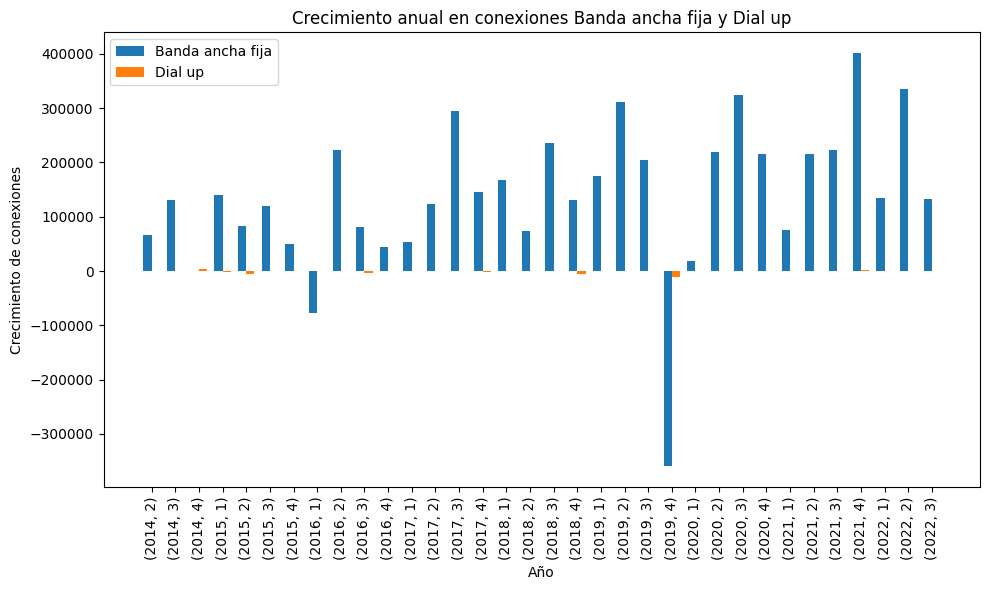

In [ ]:
import numpy as np
df_growth = data_velocidad.groupby(['Año','Trimestre'])[['Banda ancha fija', 'Dial up']].sum().diff().dropna()

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Configurar los valores de eje x y las posiciones de las barras
años = df_growth.index
x = range(len(años))

# Crear la gráfica de barras
bar_width = 0.35
ax.bar(x, df_growth['Banda ancha fija'], width=bar_width, label='Banda ancha fija')
ax.bar([i + bar_width for i in x], df_growth['Dial up'], width=bar_width, label='Dial up')

# Configurar las etiquetas del eje x y el título del gráfico
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(años, rotation=90)
ax.set_xlabel('Año')
ax.set_ylabel('Crecimiento de conexiones')
ax.set_title('Crecimiento anual en conexiones Banda ancha fija y Dial up')

# Configurar la leyenda
ax.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

* en este grafico se observa el comportamiento en el crecimiento de las conexiones a nivel nacional, donde vemos un continuo crecimiento de las conexiones, a excepcion de dos periodos,(1 - 2016) (4 - 2019) los cuales se deben a factores socio-economicos que afectaron Argentina.pero en los periodos de lso años posteriores se observo su rapido aumneto nueamente esto tambien impulsado por la pandemia del COVID